In [0]:
from pyspark.sql import functions
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [0]:
silver_layer_path = "abfss://team1-project2@20230821desa.dfs.core.windows.net/SilverLayer"

#### Number of opened issues in January 2015

In [0]:
issueDF = spark.read.parquet(f"{silver_layer_path}/issue").limit(500)

In [0]:
issueDF1 = issueDF.select("created_at", "state").withColumn("Open Issue Count", col("state") == "open").count()

## Count of closed and open issues by date created utilizing notebook visualizations 

In [0]:
display(issueDF)

id,assignee_id,author_association,body,closed_at,comments,comments_url,created_at,events_url,html_url,labels_url,locked,milestone_id,node_id,number,reactions_id,repository_url,state,timeline_url,title,updated_at,url,user_id
735480562,null,MEMBER,"**Describe the bug** I'm trying to remove all the core block patterns so that I can add my own, for the client to use. I'm not using core blocks so this could be a problem if they try to use core patterns. The core blocks are just put in the uncategorized category, and if you click on them they are not used (the notice will go off in the editor). **To reproduce** Steps to reproduce the behavior: 1. Remove core patterns and categories ```php add_action('init', 'removeCorePatterns'); function removeCorePatterns() { remove_theme_support('core-block-patterns'); unregister_block_pattern_category('buttons'); unregister_block_pattern_category('columns'); unregister_block_pattern_category('gallery'); unregister_block_pattern_category('header'); unregister_block_pattern_category('text'); unregister_block_pattern_category('uncategorized'); } ``` 2. Register your pattern and category 3. Open the editor 4. Check the patterns ![patterns](https://user-images.githubusercontent.com/8638515/98014895-7f525b80-1dfc-11eb-9809-2f763b78ceaf.png) **Expected behavior** There should be only one registered category with my patterns. The core patterns should be removed, not put in an uncategorized category that is shown instead. **Editor version (please complete the following information):** - WordPress version: 5.5.3 - Does the website has Gutenberg plugin installed, or is it using the block editor that comes by default? default - If the Gutenberg plugin is installed, which version is it? N/A **Desktop (please complete the following information):** - OS: MacOS 10.15.7 (19H2) - Browser: Chrome - Version: 86.0.4240.111 (Official Build) (x86_64)",2021-03-15T15:58:06.000+0000,3,https://api.github.com/repos/WordPress/gutenberg/issues/26667/comments,2020-11-03T16:49:29.000+0000,https://api.github.com/repos/WordPress/gutenberg/issues/26667/events,https://github.com/WordPress/gutenberg/issues/26667,https://api.github.com/repos/WordPress/gutenberg/issues/26667/labels{/name},false,null,MDU6SXNzdWU3MzU0ODA1NjI=,26667,null,https://api.github.com/repos/WordPress/gutenberg,closed,https://api.github.com/repos/WordPress/gutenberg/issues/26667/timeline,Removing core pattern category and core block patterns doesn't remove them,2022-01-14T19:43:05.000+0000,https://api.github.com/repos/WordPress/gutenberg/issues/26667,8638515
748788491,null,NONE,"<!-- Thanks for opening an issue! A few things to keep in mind: - Before reporting a bug, please try reproducing your issue with the latest version. - Please verify that the bug is related to the desktop app, and NOT the main web app by testing in Chrome/Firefox. - If the issue also occurs in the browser, report to https://github.com/RocketChat/Rocket.Chat instead --> ## My Setup - Operating System: Mac OS 10.15.7 - App Version: 3.0.7 - Installation type: dmg <!-- Answer questions by putting x in box, e.g. [x] --> - [x] I have tested with the latest version - [x] I can simulate the issue easily ## Description Latest desktop client is a resource hog even for electron. I do see visible delays when typing and CPU usages spikes up to 60%+ (considering I'm running mbp 16"" with i9). It even consumes 10-20% on idle and my estimated battery time drops by an hour as soon, as I start intensive messaging. ### Current Behavior CPU usage is way too high ### Expected Behavior CPU usage should be near zero, as this is just typing",null,7,https://api.github.com/repos/RocketChat/Rocket.Chat.Electron/issues/1890/comments,2020-11-23T13:08:55.000+0000,https://api.github.com/repos/RocketChat/Rocket.Chat.Electron/issues/1890/events,https://github.com/RocketChat/Rocket.Chat.Electron/issues/1890,https://api.github.com/repos/RocketChat/Rocket.Chat.Electron/issues/1890/labels{/name},false,null,MDU6SXNzdWU3NDg3OD

Databricks visualization. Run in Databricks to view.

#### Closer look at the bar graph displayed within the Issue Dataframe


![newplot](files/newplot__1_.png)

## PushEvent data - determining whether the commit is on the main branch or not.
note: the following code can be condensed into fewer steps when doing analysis in production use. You can use split() and do the boolean logic in the same line, but for testing and explanation purposes, we have it separated.

In [0]:
pushEventDF = spark.read.parquet(f"{silver_layer_path}/push-event").limit(100)

In [0]:
# First, we create a new column that creates an array delimited by "/"
pushEventDF = pushEventDF.withColumn("ref_split", split(col("ref"), "/"))

In [0]:
# Next, we create a column that that will hold a true or false value, to see if the third element in the array is called main or master
pushEventDF = pushEventDF.withColumn("main", (col("ref_split")[2] == "main") | (col("ref_split")[2] == "master"))

In [0]:
# We can drop the "ref_split" column now since we won't need it
pushEventDF = pushEventDF.drop("ref_split")

In [0]:
# See the last column called "main" to look at the new column that we created
display(pushEventDF)

id,actor_id,before,created_at,distinct_size,head,org_id,public,ref,repo_id,size,main
19581451884,70075839,c8470b64913ebd7bec3fbd3f22a13e09bf1224da,2022-01-04T21:58:18.000+0000,1,dadd86f612acb32248133270427533e2c4698997,null,true,refs/heads/master,440918906,1,true
19582476602,72028234,9a13a22c543c814d6db070a799e93d5e073f8bf1,2022-01-04T23:45:20.000+0000,1,a09f4b34e121a20b3c2ae7c5a5ce0b73b9b3b5a1,null,true,refs/heads/main,444470435,1,true
19583349107,58204484,065ed9a41dfcd522ca9e89d324be219f547bd4d3,2022-01-05T01:29:17.000+0000,1,fb38347528e5c0ac989cf109cdeed265089fd5a6,null,true,refs/heads/master,433945136,1,true
19581992051,21283655,e9d7797aadbfcce8354f1d13b6f2025206c9273d,2022-01-04T22:50:47.000+0000,1,8ab96fc2883c6b65c06c301cce75919b719279fb,null,true,refs/heads/develop,442207004,1,false
19583095854,41898282,424b3d940ab4ab6affe216052a10b4c26e74c137,2022-01-05T00:58:34.000+0000,1,f5bed0efc782a7f443df39d72842d5a39c0940d9,null,true,refs/heads/output,436437400,1,false
19582595066,48495458,fa54870c16b8668f50f9969bc49ffd16415bdae3,2022-01-05T00:00:46.000+0000,1,f162b84f9e251c0bc68925cbd5417175883c2eeb,48530990,true,refs/heads/bump_toolchain_development,310658818,1,false
19582213444,45881929,1b33df980c25e212131a2bdbb43c95fff0a23390,2022-01-04T23:14:38.000+0000,1,878cb34390ee7352d5bfc30e77ea0baa1e58966f,null,true,refs/heads/main,444586723,1,true
19581025204,58749704,b6d874f5dfe917b97b7c09e8f5571d22a82ed888,2022-01-04T21:20:32.000+0000,1,8112d966a757afa180808e05534a9a458b02e46a,null,true,refs/heads/master,443684918,1,true
19581646318,41898282,abd2c82bde56150aebc7e4f73308924d51c8012b,2022-01-04T22:16:04.000+0000,1,51f5e40506239bc229d87cf05ca25f8d0ee7fe20,null,true,refs/heads/master,327662670,1,true
19581082888,8517910,57a1a3112be4b116e6763bb1d7a01997ac5e988b,2022-01-04T21:25:27.000+0000,0,57a1a3112be4b116e6763bb1d7a01997ac5e988b,8158177,true,refs/heads/issue/FINI-794,265094441,0,false


Here is a pie chart to show the percentage of events that were on the main branch

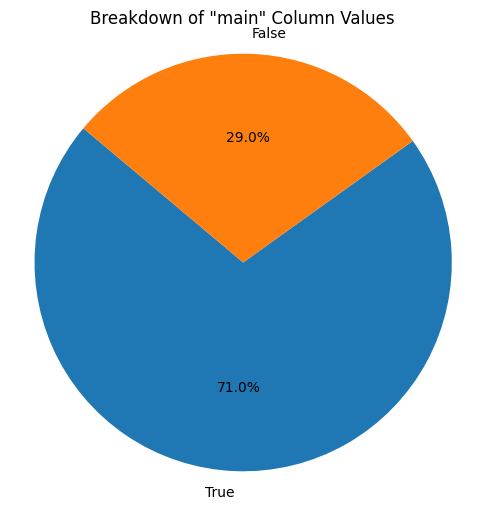

In [0]:
import matplotlib.pyplot as plt

true_count = df.filter(df["main"] == True).count()
false_count = df.filter(df["main"] == False).count()

# Create a list of counts
counts = [true_count, false_count]

# Create labels for the pie chart
labels = ['True', 'False']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Breakdown of "main" Column Values')
plt.axis('equal') 

plt.show()

## Data aggregated by type of GitHub event per hour

##### File Paths

In [0]:
commit_comment_event_path = f"{silver_layer_path}/commit-comment-event/part-00000-tid-5736585449251506491-c89433da-20bf-45e7-ba9d-89be4c00a62b-14300-1-c000.snappy.parquet"
create_event_path = f"{silver_layer_path}/create-event/part-00000-tid-5416760396886202297-1c614cc8-57f4-465a-8768-d2ad1faf5aef-16252-1-c000.snappy.parquet"
delete_event_path = f"{silver_layer_path}/delete-event/part-00000-tid-7187414516776711210-4eb28e6d-f0ec-4662-8900-838572028924-16775-1-c000.snappy.parquet"
fork_event_path = f"{silver_layer_path}/fork-event/part-00000-tid-179869891527690896-5242fc19-38bd-4907-908e-9d49bbf0ed79-17178-1-c000.snappy.parquet"
gollum_event_path = f"{silver_layer_path}/gollum-event/part-00000-tid-8450354050778032194-7ee68a2d-7f39-4568-8dc5-34848216bcdc-17418-1-c000.snappy.parquet"
issue_event_path = f"{silver_layer_path}/issue-event/part-00000-tid-1120293636439459751-1aa1f454-c8a4-4dec-9ed3-4bd914ce1fc2-19222-1-c000.snappy.parquet"
issue_comment_event_path = f"{silver_layer_path}/issue-comment-event/part-00000-tid-7758699775186239304-cf1d0ec3-7de3-498e-93fe-1c2be2e68ebf-18166-1-c000.snappy.parquet"
member_event_path = f"{silver_layer_path}/member-event/part-00000-tid-6253046353971510580-987ad5a1-0528-4b23-ad4e-520e98968667-22082-1-c000.snappy.parquet"
public_event_path = f"{silver_layer_path}/public-event/part-00000-tid-9184318786029602356-f7eb0774-3701-4755-ac0c-c841d0604e3b-6358-1-c000.snappy.parquet"
pull_request_event_path = f"{silver_layer_path}/pull-request-event/part-00000-tid-4307266401185897205-1495212b-428c-4e26-8d86-01b99c6622aa-24275-1-c000.snappy.parquet"
pull_request_review_comment_event_path = f"{silver_layer_path}/pull-request-review-comment-event/part-00000-tid-815482214086004909-d164ecfe-a8b5-414c-9855-fe718e367729-24690-1-c000.snappy.parquet"
pull_request_review_event_path = f"{silver_layer_path}/pull-request-review-event/part-00000-tid-4851132652600641377-bbcc35ee-bd97-41b7-ba10-ae09ff6fa5a2-25760-1-c000.snappy.parquet"
push_event_path = f"{silver_layer_path}/push-event/part-00000-tid-7305271067516031432-6bed0c28-4597-4c28-b4bf-cbf4d00c3467-28088-1-c000.snappy.parquet"
release_event_path = f"{silver_layer_path}/release-event/part-00000-tid-3730792204870876470-fdf8206f-6597-430b-bf01-0b735d385270-28652-1-c000.snappy.parquet"
watch_event_path = f"{silver_layer_path}/watch-event/part-00000-tid-1083500005397686129-fde53c0a-8342-47a8-b4ed-d07759434fb2-42216-1-c000.snappy.parquet"

##### Read in events as DataFrames

In [0]:
commit_comment_event = spark.read.parquet(commit_comment_event_path)
create_event = spark.read.parquet(create_event_path)
delete_event = spark.read.parquet(delete_event_path)
fork_event = spark.read.parquet(fork_event_path)
gollum_event = spark.read.parquet(gollum_event_path)
issue_event = spark.read.parquet(issue_event_path)
issue_comment_event = spark.read.parquet(issue_comment_event_path)
member_event = spark.read.parquet(member_event_path)
public_event = spark.read.parquet(public_event_path)
pull_request_event = spark.read.parquet(pull_request_event_path)
pull_request_review_comment_event = spark.read.parquet(pull_request_review_comment_event_path)
pull_request_review_event = spark.read.parquet(pull_request_review_event_path)
push_event = spark.read.parquet(push_event_path)
release_event = spark.read.parquet(release_event_path)
watch_event = spark.read.parquet(watch_event_path)

##### DataFrames of only event type and hour created at

In [0]:
commit_comment = commit_comment_event.withColumn("event_type", lit("commit_comment")).select("event_type", hour("created_at").alias("hour"))
create = create_event.withColumn("event_type", lit("create")).select("event_type", hour("created_at").alias("hour"))
delete = delete_event.withColumn("event_type", lit("delete")).select("event_type", hour("created_at").alias("hour"))
fork = fork_event.withColumn("event_type", lit("fork")).select("event_type", hour("created_at").alias("hour"))
gollum = gollum_event.withColumn("event_type", lit("gollum")).select("event_type", hour("created_at").alias("hour"))
issue = issue_event.withColumn("event_type", lit("issue")).select("event_type", hour("created_at").alias("hour"))
issue_comment = issue_comment_event.withColumn("event_type", lit("issue_comment")).select("event_type", hour("created_at").alias("hour"))
member = member_event.withColumn("event_type", lit("member")).select("event_type", hour("created_at").alias("hour"))
public = public_event.withColumn("event_type", lit("public")).select("event_type", hour("created_at").alias("hour"))
pull_request = pull_request_event.withColumn("event_type", lit("pull_request")).select("event_type", hour("created_at").alias("hour"))
pull_request_review_comment = pull_request_review_comment_event.withColumn("event_type", lit("pull_request_review_comment")).select("event_type", hour("created_at").alias("hour"))
pull_request_review = pull_request_review_event.withColumn("event_type", lit("pull_request_review")).select("event_type", hour("created_at").alias("hour"))
push = push_event.withColumn("event_type", lit("push")).select("event_type", hour("created_at").alias("hour"))
release = release_event.withColumn("event_type", lit("release")).select("event_type", hour("created_at").alias("hour"))
watch = watch_event.withColumn("event_type", lit("watch")).select("event_type", hour("created_at").alias("hour"))

In [0]:
events_by_hour = (
    (
        commit_comment.union(create)
        .union(delete)
        .union(fork)
        .union(gollum)
        .union(issue)
        .union(issue_comment)
        .union(member)
        .union(public)
        .union(pull_request)
        .union(pull_request_review_comment)
        .union(pull_request_review)
        .union(push)
        .union(release)
        .union(watch)
    )
    .groupBy("event_type", "hour")
    .count()
)

In [0]:
display(events_by_hour)

event_type,hour,count
create,10,314136
create,16,340730
create,7,273322
create,6,256320
create,15,342215
create,8,301708
create,18,315442
create,22,268196
create,23,255687
create,3,249591


Databricks visualization. Run in Databricks to view.

![events by hour](files/team1_event_by_hour.png)